# Fuente:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'E:\\'

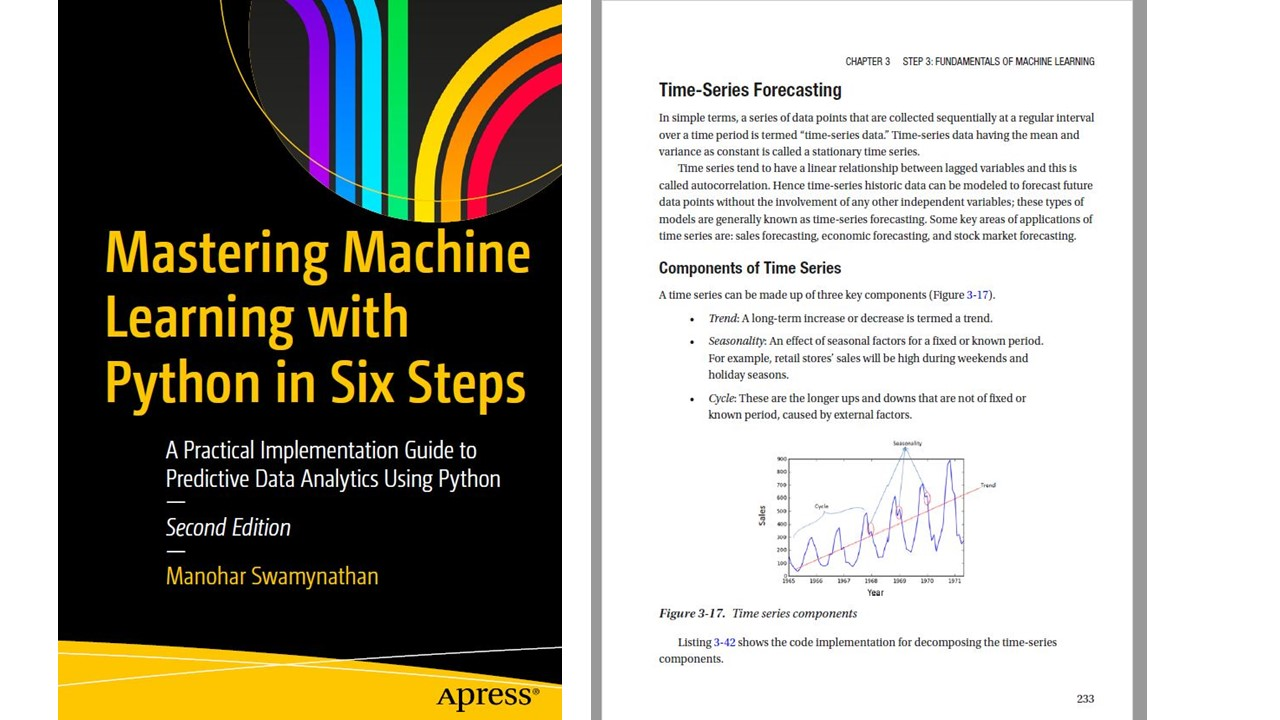

In [2]:
from IPython.display import Image
Image(filename='libro_capitulo3.jpg', width=900)

# Pronóstico de series de tiempo

En términos simples, los puntos de datos que se recopilan secuencialmente en un intervalo regular con asociación durante un período de tiempo se denominan datos de series temporales. Los datos de series de tiempo que tienen la media y la varianza como constantes se denominan series de tiempo estacionarias. Las series de tiempo tienden a tener una relación lineal entre las variables rezagadas y esto se denomina autocorrelación. 

Por lo tanto, se pueden modelar datos históricos de series temporales para pronosticar los puntos de datos futuros sin la participación de ninguna otra variable independiente; estos tipos de modelos se conocen generalmente como pronósticos de series temporales. Para nombrar algunas áreas clave de aplicaciones de series temporales, se encuentran la previsión de ventas, la previsión económica, la previsión del mercado de valores, etc.

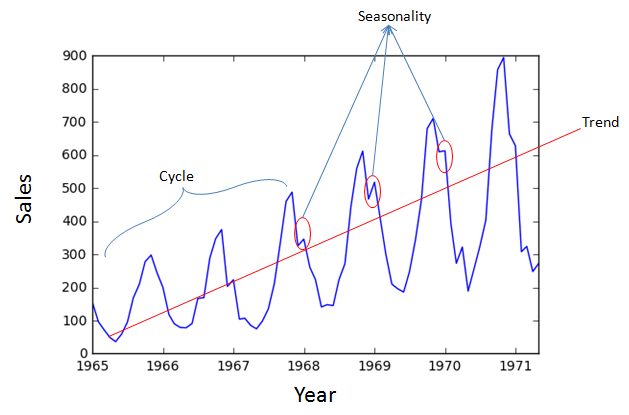

In [3]:
Image(filename='Time_Series.png', width=500)

# Media móvil integrada autorregresiva (ARIMA)

In [4]:
import pandas as pd

#from statsmodels.graphics.api import qqplot

Pronostiquemos los datos de ventas usando ARIMA

In [5]:
# Data Source: O.D. Anderson (1976), in file: data/anderson14, Description: Monthly sales of company X Jan ’65 – May ’71 C. Cahtfield        

df = pd.read_csv('TS.csv')
df.head()

,Month,Sales
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


In [6]:
df.tail()

,Month,Sales
72,1971-01,628
73,1971-02,308
74,1971-03,324
75,1971-04,248
76,1971-05,272


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   77 non-null     object
 1   Sales   77 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [8]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [9]:
df.describe()

,Sales
count,77.000000
mean,298.402597
std,198.430570
min,36.000000
25%,148.000000
50%,257.000000
75%,392.000000
max,895.000000


In [10]:
import matplotlib.pylab as plt
%matplotlib inline

In [11]:
import seaborn as sb

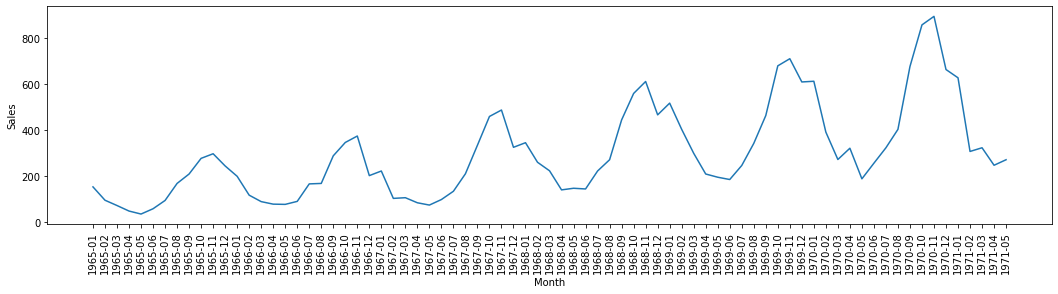

In [12]:
# plt.rcParams['figure.figsize'] = (6.4, 4.8)
plt.rcParams['figure.figsize'] = (18, 4)

sb.lineplot(x = "Month", y = "Sales", data = df)
plt.xticks(rotation = 90)
plt.show()

In [13]:
ts = pd.Series(list(df['Sales']), index=pd.to_datetime(df['Month'], format='%Y-%m'))
ts.head()

Month
1965-01-01    154
1965-02-01     96
1965-03-01     73
1965-04-01     49
1965-05-01     36
dtype: int64

In [14]:
ts.describe()

count     77.000000
mean     298.402597
std      198.430570
min       36.000000
25%      148.000000
50%      257.000000
75%      392.000000
max      895.000000
dtype: float64

In [15]:
type(ts)

pandas.core.series.Series

<AxesSubplot:xlabel='Month'>

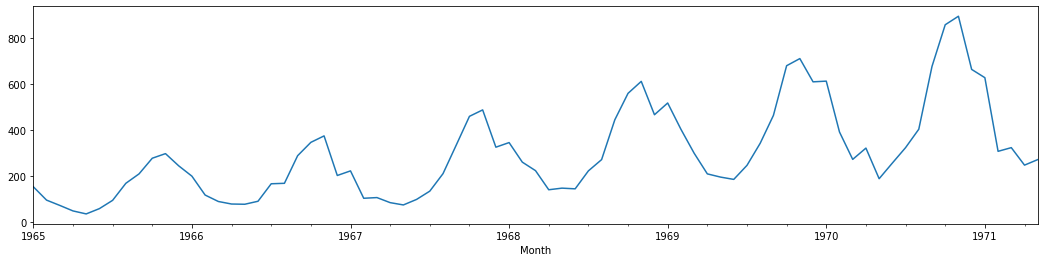

In [16]:
ts.plot()

## Descomponer series de tiempo

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

Descomposición estacional usando promedios móviles.

Los resultados se obtienen estimando primero la tendencia aplicando un filtro de convolución a los datos. Luego, la tendencia se elimina de la serie y el promedio de esta serie sin tendencia para cada período es el componente estacional devuelto.

In [18]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

In [19]:
decomposition = seasonal_decompose(ts)
decomposition

### Descomposición de la tendencia

In [20]:
trend = decomposition.trend
trend

# ¿todos los datos estan vacios?

Month
1965-01-01   NaN
1965-02-01   NaN
1965-03-01   NaN
1965-04-01   NaN
1965-05-01   NaN
              ..
1971-01-01   NaN
1971-02-01   NaN
1971-03-01   NaN
1971-04-01   NaN
1971-05-01   NaN
Name: trend, Length: 77, dtype: float64

In [21]:
type(trend)

pandas.core.series.Series

In [22]:
trend.index

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01', '1965-11-01', '1965-12-01',
               '1966-01-01', '1966-02-01', '1966-03-01', '1966-04-01',
               '1966-05-01', '1966-06-01', '1966-07-01', '1966-08-01',
               '1966-09-01', '1966-10-01', '1966-11-01', '1966-12-01',
               '1967-01-01', '1967-02-01', '1967-03-01', '1967-04-01',
               '1967-05-01', '1967-06-01', '1967-07-01', '1967-08-01',
               '1967-09-01', '1967-10-01', '1967-11-01', '1967-12-01',
               '1968-01-01', '1968-02-01', '1968-03-01', '1968-04-01',
               '1968-05-01', '1968-06-01', '1968-07-01', '1968-08-01',
               '1968-09-01', '1968-10-01', '1968-11-01', '1968-12-01',
               '1969-01-01', '1969-02-01', '1969-03-01', '1969-04-01',
               '1969-05-01', '1969-06-01', '1969-07-01', '1969-08-01',
      

In [23]:
trend.describe()

count     65.000000
mean     300.855769
std      114.427242
min      148.750000
25%      186.000000
50%      285.333333
75%      409.708333
max      489.625000
Name: trend, dtype: float64

In [24]:
# cantidad de vacios

trend.isnull().sum()

12

In [25]:
# eliminando los vacios "na"

trend.dropna()

Month
1965-07-01    148.750000
1965-08-01    151.583333
1965-09-01    153.208333
1965-10-01    155.166667
1965-11-01    158.166667
                 ...    
1970-07-01    489.625000
1970-08-01    486.750000
1970-09-01    485.375000
1970-10-01    484.416667
1970-11-01    484.791667
Name: trend, Length: 65, dtype: float64

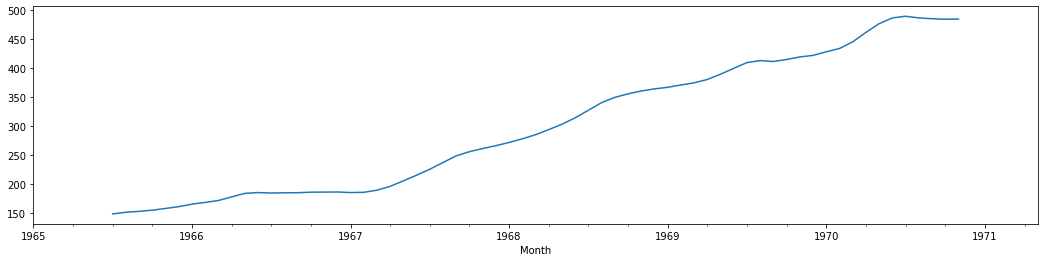

In [26]:
trend.plot()
plt.show()

### Descomposición de la estacionalidad

In [27]:
seasonal = decomposition.seasonal
seasonal

Month
1965-01-01     94.958565
1965-02-01    -33.108102
1965-03-01    -95.958102
1965-04-01   -136.083102
1965-05-01   -176.091435
                 ...    
1971-01-01     94.958565
1971-02-01    -33.108102
1971-03-01    -95.958102
1971-04-01   -136.083102
1971-05-01   -176.091435
Name: seasonal, Length: 77, dtype: float64

In [28]:
seasonal.describe()

count     77.000000
mean      -4.497171
std      139.868049
min     -176.091435
25%     -136.083102
50%      -42.458102
75%       94.958565
max      250.014120
Name: seasonal, dtype: float64

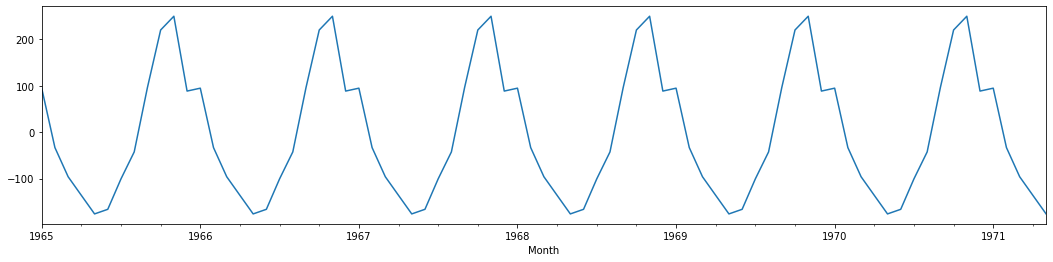

In [29]:
seasonal.plot()
plt.show()

### Descomposición de los residuales

In [30]:
residual = decomposition.resid
residual

Month
1965-01-01   NaN
1965-02-01   NaN
1965-03-01   NaN
1965-04-01   NaN
1965-05-01   NaN
              ..
1971-01-01   NaN
1971-02-01   NaN
1971-03-01   NaN
1971-04-01   NaN
1971-05-01   NaN
Name: resid, Length: 77, dtype: float64

In [31]:
residual.describe()

count     65.000000
mean       1.333102
std       57.000390
min     -111.741898
25%      -39.534954
50%       -3.666898
75%       37.041435
max      160.194213
Name: resid, dtype: float64

In [32]:
# cantidad de vacios

residual.isnull().sum()

12

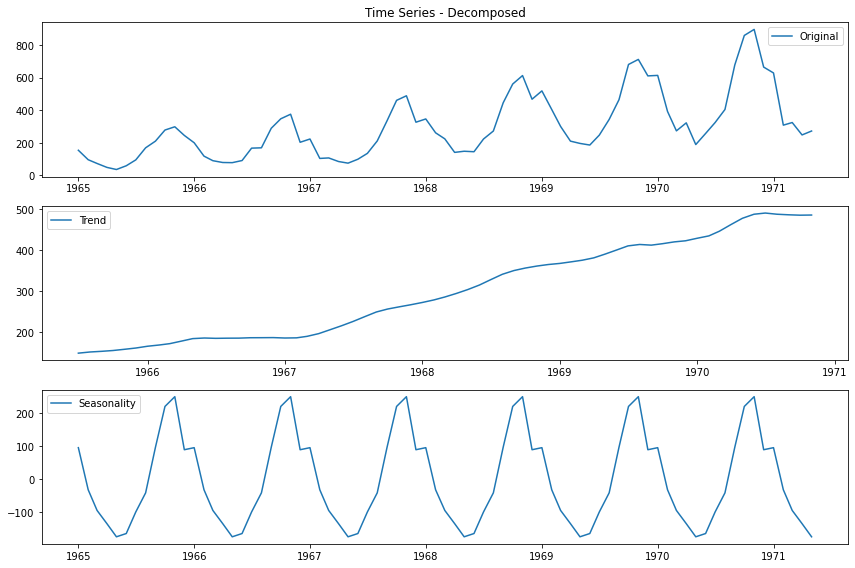

In [33]:
fig = plt.figure(figsize=(12,8))

plt.subplot(311)
plt.title('Time Series - Decomposed')
plt.plot(ts, label='Original')
plt.legend(loc='best')

plt.subplot(312)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(313)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# Revisando la estacionariedad

Dividamos los datos en train y test. Dado que es una serie de tiempo, consideremos de 1965 a 1968 para el entrenamiento y el resto para las pruebas (test).

La edición Business Forecasting de Hanke y Wichern recomienda un mínimo de 4 años de datos dependiendo de la regularidad de los datos. Si el patrón estacional es regular, los datos de 3 años serían suficientes.

### Contraste de dickey fuller

* H0: $\varphi$ = 1 ... tendendencia estocástica en las series temporales (no estacionario)
* H1: $\varphi$ < 1 ... No tendendencia estocástica en las series temporales (estacionario)

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {"c","ct","ctt","nc"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "nc" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
        values 0, 1, ..., maxlag.
    
        * If "AIC" (default)

In [36]:
s_test = adfuller(ts, autolag='AIC')
s_test

(0.6547150829524448,
 0.9888894205170052,
 12,
 64,
 {'1%': -3.53692771987915,
  '5%': -2.907887369384766,
  '10%': -2.591493291015625},
 694.8691059449682)

In [37]:
# extract p value from test results
print("p value > 0.05 means data is non-stationary: ", s_test[1])

p value > 0.05 means data is non-stationary:  0.9888894205170052


### Quitar estacionariedad

In [38]:
ts.describe()

count     77.000000
mean     298.402597
std      198.430570
min       36.000000
25%      148.000000
50%      257.000000
75%      392.000000
max      895.000000
dtype: float64

In [39]:
import numpy as np

In [40]:
# transformación de logaritmo para eliminar la variabilidad

ts_log = np.log(ts)
ts_log.head()

Month
1965-01-01    5.036953
1965-02-01    4.564348
1965-03-01    4.290459
1965-04-01    3.891820
1965-05-01    3.583519
dtype: float64

In [41]:
ts_log.describe()

count    77.000000
mean      5.466231
std       0.721249
min       3.583519
25%       4.997212
50%       5.549076
75%       5.971262
max       6.796824
dtype: float64

In [42]:
# ts_log.dropna(inplace=True)

<AxesSubplot:xlabel='Month'>

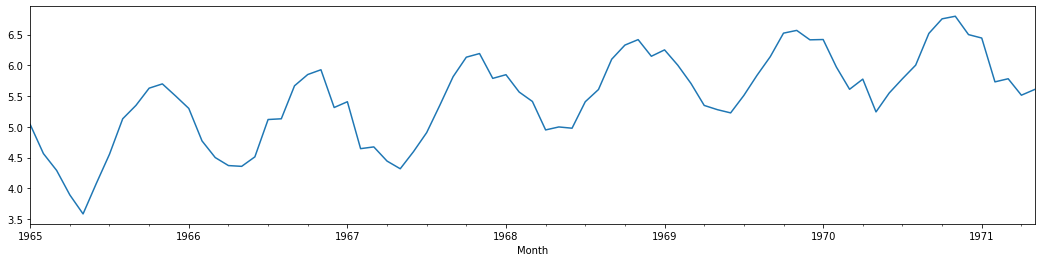

In [43]:
ts_log.plot()

In [44]:
s_test = adfuller(ts_log, autolag='AIC')
print("Log transform stationary check p value: ", s_test[1])

Log transform stationary check p value:  0.785310212484911


In [45]:
#Toma la primera diferencia:

ts_log.head()

Month
1965-01-01    5.036953
1965-02-01    4.564348
1965-03-01    4.290459
1965-04-01    3.891820
1965-05-01    3.583519
dtype: float64

In [46]:
ts_log.shift().head()

Month
1965-01-01         NaN
1965-02-01    5.036953
1965-03-01    4.564348
1965-04-01    4.290459
1965-05-01    3.891820
dtype: float64

In [47]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.head()

Month
1965-01-01         NaN
1965-02-01   -0.472604
1965-03-01   -0.273889
1965-04-01   -0.398639
1965-05-01   -0.308301
dtype: float64

In [48]:
ts_log_diff.describe()

count    76.000000
mean      0.007485
std       0.327753
min      -0.762781
25%      -0.268087
50%       0.046516
75%       0.247108
max       0.607134
dtype: float64

In [49]:
ts_log_diff.isnull().sum()

1

In [50]:
# eliminando registro vacio
ts_log_diff.dropna(inplace=True)

ts_log_diff.isnull().sum()

0

In [51]:
ts_log_diff.head()

Month
1965-02-01   -0.472604
1965-03-01   -0.273889
1965-04-01   -0.398639
1965-05-01   -0.308301
1965-06-01    0.494019
dtype: float64

Text(0, 0.5, 'First order log diff')

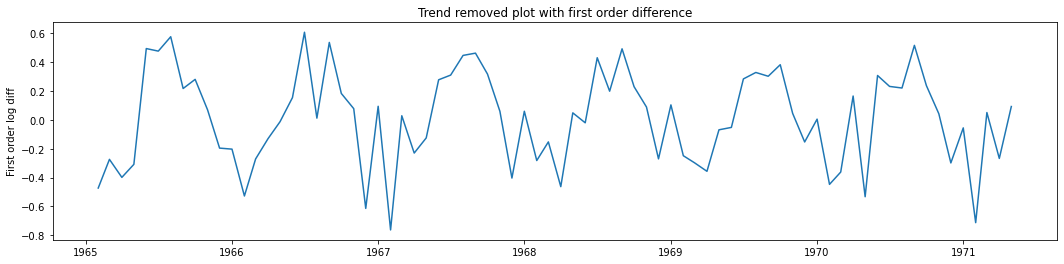

In [52]:
plt.title('Trend removed plot with first order difference')
plt.plot(ts_log_diff)
plt.ylabel('First order log diff')

In [53]:
s_test = adfuller(ts_log_diff, autolag='AIC')

print("First order difference stationary check p value: ", s_test[1])

First order difference stationary check p value:  0.02402539283987568


In [54]:
ts_log.head(20)

Month
1965-01-01    5.036953
1965-02-01    4.564348
1965-03-01    4.290459
1965-04-01    3.891820
1965-05-01    3.583519
1965-06-01    4.077537
1965-07-01    4.553877
1965-08-01    5.129899
1965-09-01    5.347108
1965-10-01    5.627621
1965-11-01    5.697093
1965-12-01    5.501258
1966-01-01    5.298317
1966-02-01    4.770685
1966-03-01    4.499810
1966-04-01    4.369448
1966-05-01    4.356709
1966-06-01    4.510860
1966-07-01    5.117994
1966-08-01    5.129899
dtype: float64

In [55]:
# la media móvil suaviza la línea

moving_avg = ts_log.rolling(12).mean() # promedio cada 12 meses
moving_avg.head(20)

Month
1965-01-01         NaN
1965-02-01         NaN
1965-03-01         NaN
1965-04-01         NaN
1965-05-01         NaN
1965-06-01         NaN
1965-07-01         NaN
1965-08-01         NaN
1965-09-01         NaN
1965-10-01         NaN
1965-11-01         NaN
1965-12-01    4.775124
1966-01-01    4.796905
1966-02-01    4.814100
1966-03-01    4.831545
1966-04-01    4.871348
1966-05-01    4.935780
1966-06-01    4.971890
1966-07-01    5.018900
1966-08-01    5.018900
dtype: float64

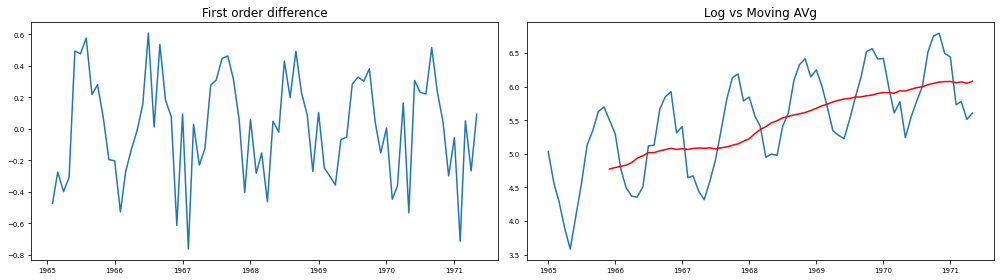

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,4))

ax1.set_title('First order difference')
ax1.tick_params(axis='x', labelsize=7)
ax1.tick_params(axis='y', labelsize=7)
ax1.plot(ts_log_diff)

ax2.plot(ts_log)
ax2.set_title('Log vs Moving AVg')
ax2.tick_params(axis='x', labelsize=7)
ax2.tick_params(axis='y', labelsize=7)
ax2.plot(moving_avg, color='red')
plt.tight_layout()

### Prueba de autocorrelación

Determinamos que el logaritmo de la serie de tiempo requiere al menos una diferenciación de orden para estacionarizarse. Ahora vamos a trazar gráficos ACF y PACF para series de registro de primer orden

In [57]:
import statsmodels.api as sm

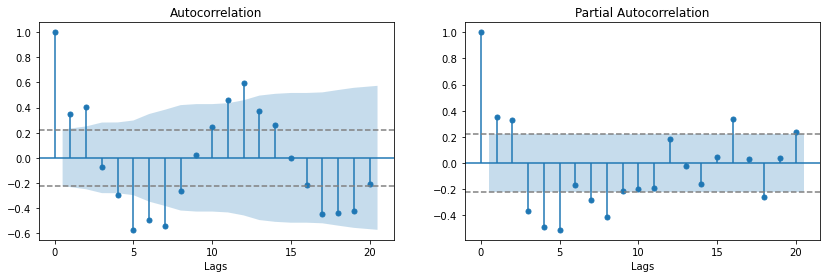

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,4))

# ACF chart
fig = sm.graphics.tsa.plot_acf(ts_log_diff.values.squeeze(), lags=20, ax=ax1)

# draw 95% confidence interval line
ax1.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax1.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax1.set_xlabel('Lags')

# PACF chart
fig = sm.graphics.tsa.plot_pacf(ts_log_diff, lags=20, ax=ax2)

# draw 95% confidence interval line
ax2.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax2.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax2.set_xlabel('Lags')

plt.show()

La gráfica PACF tiene un pico significativo solo en el retraso 1, lo que significa que todas las autocorrelaciones de orden superior se explican efectivamente por la autocorrelación de retraso 1 y retraso 2. Los valores de retraso ideales son p = 2 y q = 2, (es decir, el valor de retraso donde el gráfico ACF/PACF cruza el intervalo de confianza superior por primera vez).

## Construir modelo ARIMA y evaluar

In [59]:
help(sm.tsa.ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  .. deprecated:: 0.12
 |     Use statsmodels.tsa.arima.model.ARIMA instead
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M',

## Iniciar con: p = 2 y q = 2

In [60]:
# build model
model = sm.tsa.ARIMA(ts_log, order=(2,0,2))
model

C:\Users\caleb.terrel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [61]:
results_ARIMA = model.fit(disp=-1) 
results_ARIMA

In [62]:
ts_predict = results_ARIMA.predict()
ts_predict.head()

1965-01-01    5.484870
1965-02-01    5.083860
1965-03-01    4.491268
1965-04-01    4.246974
1965-05-01    3.997299
Freq: MS, dtype: float64

In [63]:
ts_predict.describe()

count    77.000000
mean      5.471825
std       0.674846
min       3.734685
25%       5.076007
50%       5.484870
75%       5.955834
max       6.798819
dtype: float64

In [64]:
#                                    MAE               RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy import stats

In [65]:
# Evaluate model
print("AIC: ", results_ARIMA.aic)
print("BIC: ", results_ARIMA.bic)

print("Mean Absolute Error: ", mean_absolute_error(ts_log.values, ts_predict.values))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))

# check autocorrelation
print("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

AIC:  7.8521105380968095
BIC:  21.914943069218914
Mean Absolute Error:  0.19596604649616825
Root Mean Squared Error:  0.2397921888001958
Durbin-Watson statistic : 1.8645776774163452


La práctica habitual es **construir varios modelos con diferentes *p* y *q* y seleccionar el que tenga el menor valor** de AIC, BIC, MAE y RMSE. 
Ahora aumentemos p a 3 y veamos si hay alguna diferencia en el resultado. 

## Modificar a: p = 3 y q = 2

C:\Users\caleb.terrel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AIC:  -7.7863400113742784
BIC:  8.62029794160151
Mean Absolute Error:  0.1672445428435801
Root Mean Squared Error:  0.21615638317439176
Durbin-Watson statistic : 2.5190682786750664


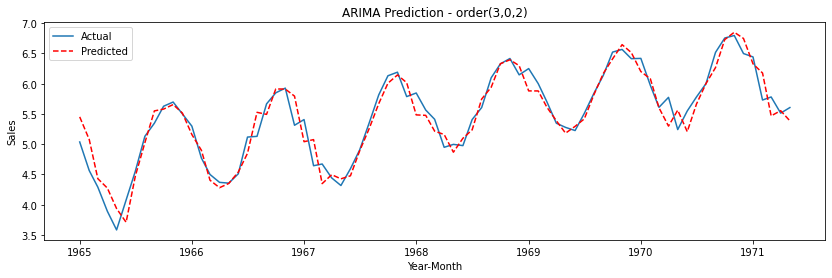

In [66]:
model = sm.tsa.ARIMA(ts_log, order=(3,0,2))
results_ARIMA = model.fit(disp=-1) 

ts_predict = results_ARIMA.predict()

plt.rcParams['figure.figsize'] = (14, 4)

plt.title('ARIMA Prediction - order(3,0,2)')
plt.plot(ts_log, label='Actual')
plt.plot(ts_predict, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc='best')

print("AIC: ", results_ARIMA.aic)
print("BIC: ", results_ARIMA.bic)

print("Mean Absolute Error: ", mean_absolute_error(ts_log.values, ts_predict.values))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))

# check autocorrelation
print("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

### Intentemos con una diferencia de nivel (d = 1)

In [67]:
model = sm.tsa.ARIMA(ts_log, order=(3,1,2))
results_ARIMA = model.fit(disp=-1) 

ts_predict = results_ARIMA.predict()
ts_predict.head()

C:\Users\caleb.terrel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\caleb.terrel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


1965-02-01    0.019698
1965-03-01   -0.164604
1965-04-01   -0.219551
1965-05-01   -0.066784
1965-06-01   -0.007880
Freq: MS, dtype: float64

In [68]:
# Corrección por diferencia
predictions_ARIMA_diff = pd.Series(ts_predict, copy=True)
predictions_ARIMA_diff.head()

1965-02-01    0.019698
1965-03-01   -0.164604
1965-04-01   -0.219551
1965-05-01   -0.066784
1965-06-01   -0.007880
Freq: MS, dtype: float64

In [69]:
# suma acumulada
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

1965-02-01    0.019698
1965-03-01   -0.144906
1965-04-01   -0.364457
1965-05-01   -0.431241
1965-06-01   -0.439120
Freq: MS, dtype: float64

In [70]:
ts_log.head()

Month
1965-01-01    5.036953
1965-02-01    4.564348
1965-03-01    4.290459
1965-04-01    3.891820
1965-05-01    3.583519
dtype: float64

In [71]:
ts_log.iloc[0]

5.0369526024136295

In [72]:
ts_log.index[:5]

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [73]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log.head()

Month
1965-01-01    5.036953
1965-02-01    5.036953
1965-03-01    5.036953
1965-04-01    5.036953
1965-05-01    5.036953
dtype: float64

In [74]:
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

1965-01-01    5.036953
1965-02-01    5.056651
1965-03-01    4.892047
1965-04-01    4.672496
1965-05-01    4.605712
dtype: float64

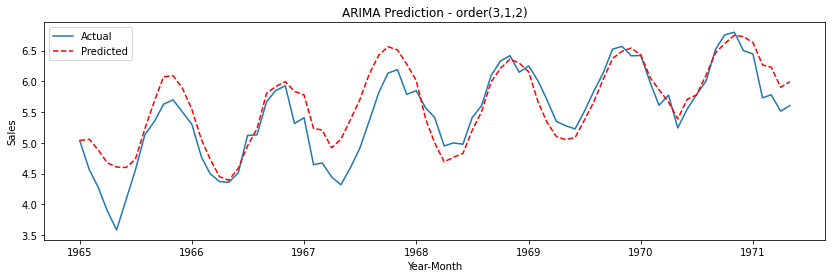

In [75]:
plt.title('ARIMA Prediction - order(3,1,2)')
plt.plot(ts_log, label='Actual')
plt.plot(predictions_ARIMA_log, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc='best')

In [76]:
print("AIC: ", results_ARIMA.aic)
print("BIC: ", results_ARIMA.bic)

print("Mean Absolute Error: ", mean_absolute_error(ts_log_diff.values, ts_predict.values))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log_diff.values, ts_predict.values)))

# check autocorrelation
print("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

AIC:  -35.418987738156744
BIC:  -19.103854356152425
Mean Absolute Error:  0.1387654875264567
Root Mean Squared Error:  0.18310244855963775
Durbin-Watson statistic : 1.9411613272432708


En el gráfico anterior podemos ver que el modelo está sobreprediciendo en algunos lugares y los valores de AIC y BIC son más altos que el modelo anterior. Nota: AIC/BIC puede ser positivo o negativo; sin embargo, debemos mirar el valor absoluto de la misma para la evaluación.

### Predecir los valores futuros

Los valores a continuación (p=3, d=0, q=2) dan el número más pequeño para las metricas de evaluación, así que usemos esto como un modelo final para predecir los valores futuros, para el año 1972.

In [77]:
# final model
model = sm.tsa.ARIMA(ts_log, order=(3,0,2))
results_ARIMA = model.fit(disp=-1) 

# predict future values
ts_predict = results_ARIMA.predict('1971-06-01', '1972-05-01')
ts_predict.head()

C:\Users\caleb.terrel\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


1971-06-01    5.581795
1971-07-01    5.669382
1971-08-01    5.839116
1971-09-01    6.040588
1971-10-01    6.215625
Freq: MS, dtype: float64

In [78]:
ts_predict.tail()

1972-01-01    6.184774
1972-02-01    5.983077
1972-03-01    5.747008
1972-04-01    5.533761
1972-05-01    5.394511
Freq: MS, dtype: float64

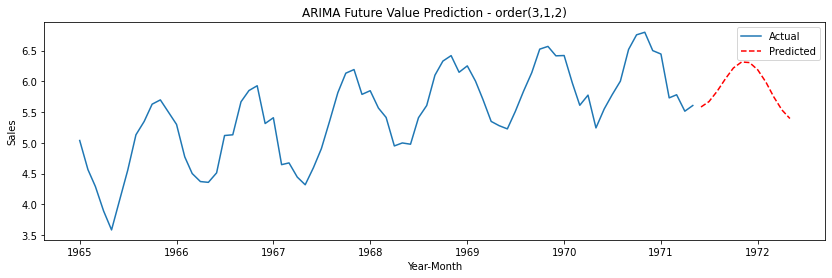

In [79]:
plt.title('ARIMA Future Value Prediction - order(3,1,2)')
plt.plot(ts_log, label='Actual')
plt.plot(ts_predict, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc='best')